In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data = pd.read_csv("D:/ML/Practical/ML Dataset/Country-data.csv")

In [3]:
print(data.columns)
print(data.shape)

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')
(167, 10)


In [4]:
X = data.iloc[:, [5,6,9]].values
X[0]
X[1]

array([9.93e+03, 4.49e+00, 4.09e+03])

[117459180692.56412]
[117459180692.56412, 36527935930.89251]
[117459180692.56412, 36527935930.89251, 24461981059.313717]
[117459180692.56412, 36527935930.89251, 24461981059.313717, 14873986316.568428]
[117459180692.56412, 36527935930.89251, 24461981059.313717, 14873986316.568428, 11524667361.155376]
[117459180692.56412, 36527935930.89251, 24461981059.313717, 14873986316.568428, 11524667361.155376, 7903575913.507376]
[117459180692.56412, 36527935930.89251, 24461981059.313717, 14873986316.568428, 11524667361.155376, 7903575913.507376, 5355034236.659975]
[117459180692.56412, 36527935930.89251, 24461981059.313717, 14873986316.568428, 11524667361.155376, 7903575913.507376, 5355034236.659975, 4864986299.453974]
[117459180692.56412, 36527935930.89251, 24461981059.313717, 14873986316.568428, 11524667361.155376, 7903575913.507376, 5355034236.659975, 4864986299.453974, 3787132596.728006]
[117459180692.56412, 36527935930.89251, 24461981059.313717, 14873986316.568428, 11524667361.155376, 790357591

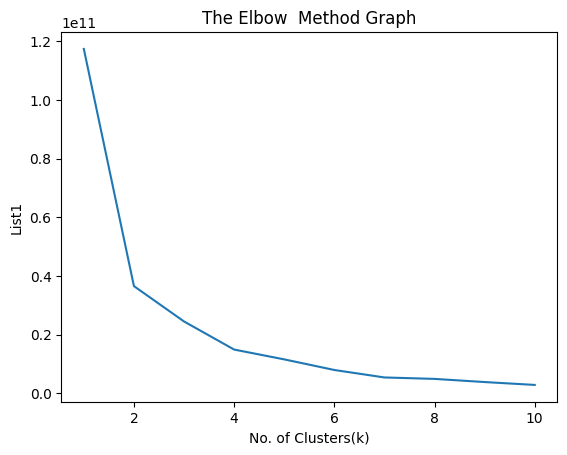

In [5]:
from sklearn.cluster import KMeans
list1 = []
for i in range(1, 11):
    Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    Kmeans.fit(X)
    list1.append(Kmeans.inertia_)
    print(list1)
plt.plot(range(1, 11), list1)
plt.title('The Elbow  Method Graph')
plt.xlabel('No. of Clusters(k)')
plt.ylabel('List1')
plt.show()


In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
#y_kmeans = kmeans.fit_predict(X)
#print(X[y_kmeans==0, 0], X[y_kmeans==0, 1] )
#print(X[y_kmeans==1, 0], X[y_kmeans==1, 1] )
#print(X[y_kmeans==2, 0], X[y_kmeans==2, 1] )
#print(X[y_kmeans==3, 0], X[y_kmeans==3, 1] )
#print(X[y_kmeans==4, 0], X[y_kmeans==4, 1] )
y_kmeans = kmeans.fit(X)
from sklearn import metrics
from sklearn.metrics import pairwise_distances
labels = y_kmeans.labels_
print(labels)
#Silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
metrics.silhouette_score(X, labels, metric='euclidean') 

[1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 2 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0
 0 0 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 2 0 1 1 1 1 1 1 0 2 1 1 1 1 0 1 1 1 1 2 1 0 1 1 0 0 1 1 1 1 0 2 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1]


0.7003629894261646

[1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 2 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0
 0 0 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 2 0 1 1 1 1 1 1 0 2 1 1 1 1 0 1 1 1 1 2 1 0 1 1 0 0 1 1 1 1 0 2 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1]


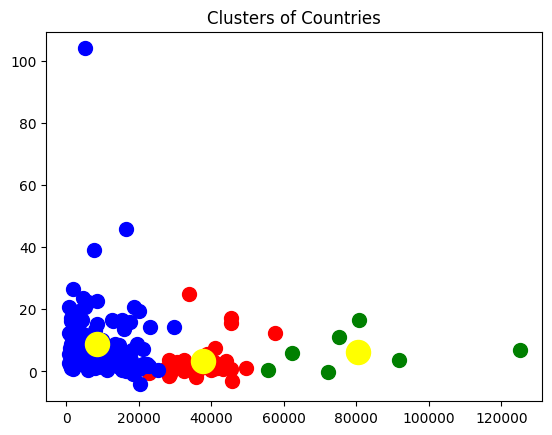

In [7]:
#6 Visualising the clusters
y_kmeans = kmeans.fit_predict(X)
#print(X)
print(y_kmeans)
#print(len(X[y_kmeans==0, 0]))#, X[y_kmeans==0, 1])
#print(X[y_kmeans==0, 0])
#print(print(X[y_kmeans==0, 0], X[y_kmeans==0, 1]))
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Countries')
plt.show()

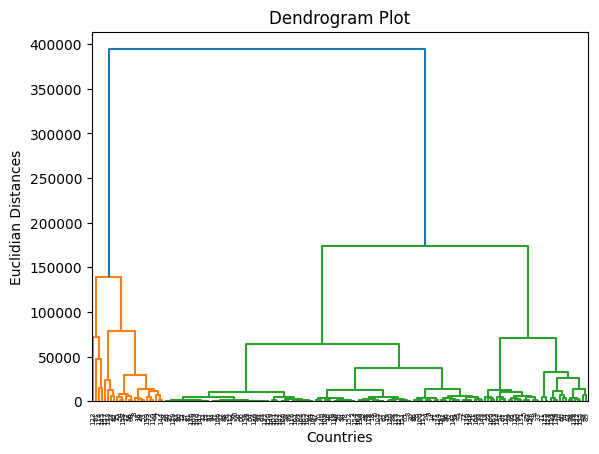

In [8]:
import scipy.cluster.hierarchy as shc
dendro = shc.dendrogram(shc.linkage(X, method="ward"))
plt.title("Dendrogram Plot")
plt.ylabel("Euclidian Distances")
plt.xlabel("Countries")
plt.show()

In [9]:
#training the hierarchical model on dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_kmeans = hc.fit(X)
labels = y_kmeans.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'